In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Telecom Dataset

In [2]:
customer = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=[" "])

In [3]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
del customer["customerID"]

customerID doesn’t help to predict

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


## Missing Data

In [6]:
customer.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
customer = customer.dropna()

In [8]:
customer.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see, gender is not the key feature to decide whether the customer is going to churn (leave the telecom company) or not.

In [9]:
numerics = ['float64', 'int64']
cn = customer.select_dtypes(include=numerics)
co = customer.select_dtypes(exclude=numerics)

In [10]:
cn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen is in worry type

In [11]:
customer['SeniorCitizen'] = customer['SeniorCitizen'].astype('category')

In [12]:
numerics = ['float64', 'int64']
cn = customer.select_dtypes(include=numerics)
co = customer.select_dtypes(exclude=numerics)

In [13]:
cn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [17]:
co.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [14]:
customer.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

## Data Visualization

tenure               AxesSubplot(0.125,0.125;0.227941x0.755)
MonthlyCharges    AxesSubplot(0.398529,0.125;0.227941x0.755)
TotalCharges      AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

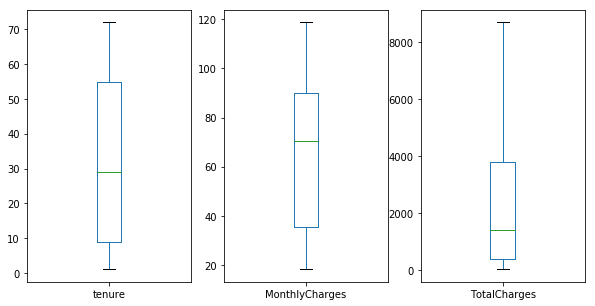

In [15]:
cn.plot(kind='box',subplots = True ,figsize=(10,5))

In [16]:
cn = pd.concat([cn,customer['Churn']],axis=1)

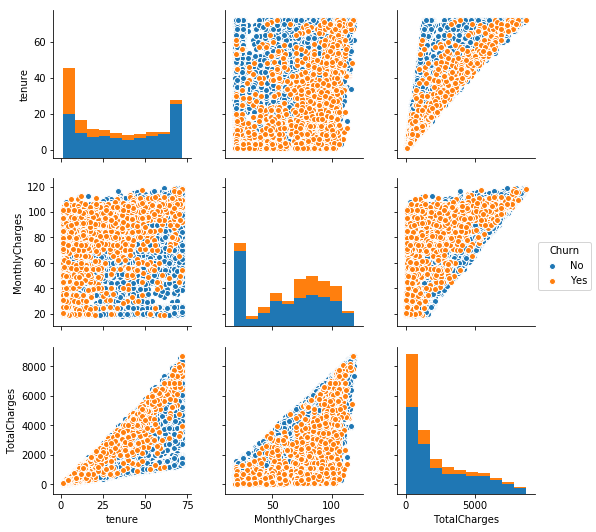

In [17]:
sns.pairplot(cn,hue='Churn')

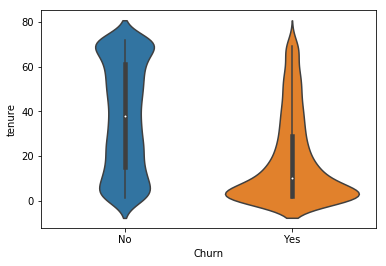

In [18]:
sns.violinplot(x='Churn', y='tenure', data=cn)

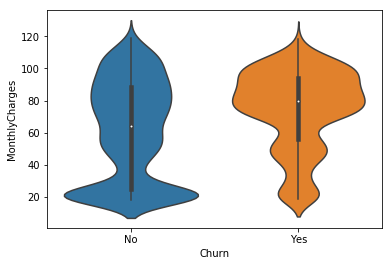

In [19]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=cn);

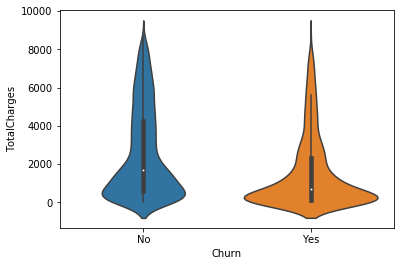

In [20]:
sns.violinplot(x="Churn", y="TotalCharges", data=cn);

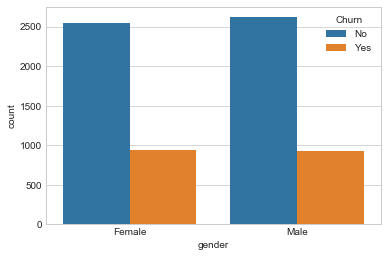

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='gender',hue='Churn',data=customer)

As we can see, gender is not the key feature to decide whether the customer is going to churn (leave the telecom company) or not.

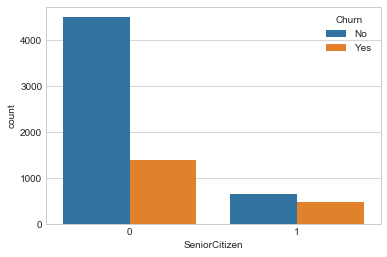

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='SeniorCitizen',hue='Churn',data=customer)

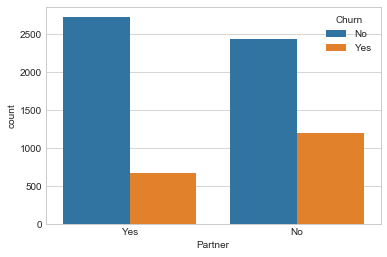

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Partner',hue='Churn',data=customer)

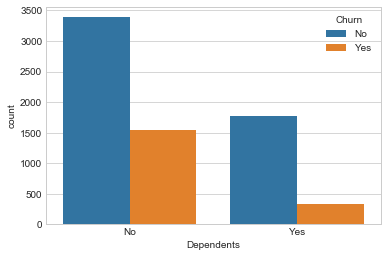

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Dependents',hue='Churn',data=customer)

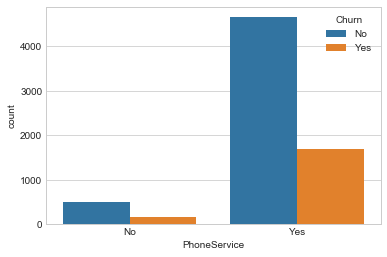

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='PhoneService',hue='Churn',data=customer)

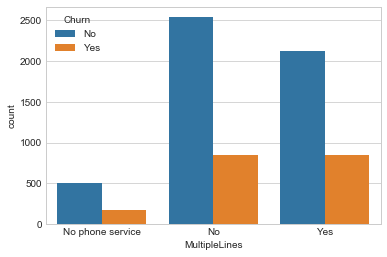

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='MultipleLines',hue='Churn',data=customer)

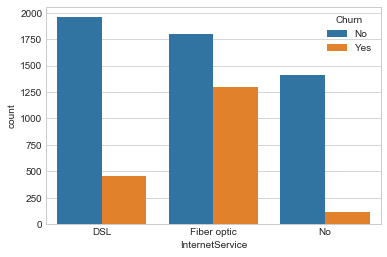

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='InternetService',hue='Churn',data=customer)

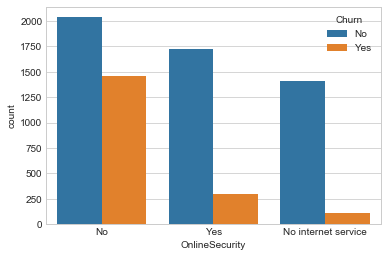

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='OnlineSecurity',hue='Churn',data=customer)

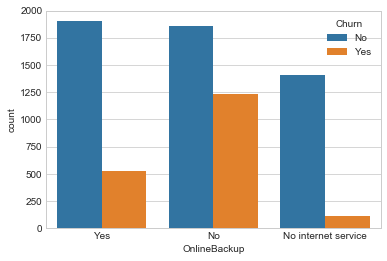

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='OnlineBackup',hue='Churn',data=customer)

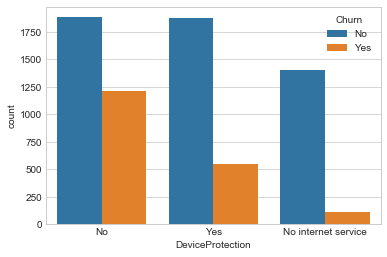

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='DeviceProtection',hue='Churn',data=customer)

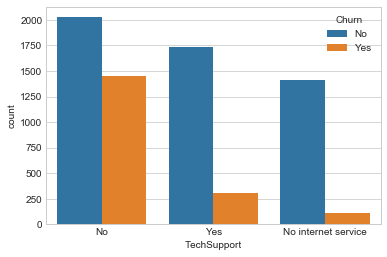

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='TechSupport',hue='Churn',data=customer)

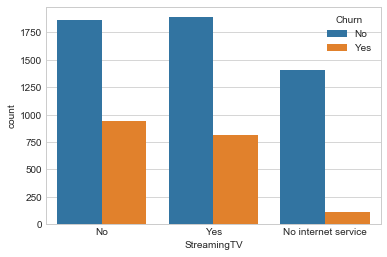

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='StreamingTV',hue='Churn',data=customer)

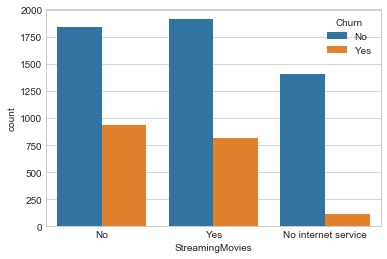

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='StreamingMovies',hue='Churn',data=customer)

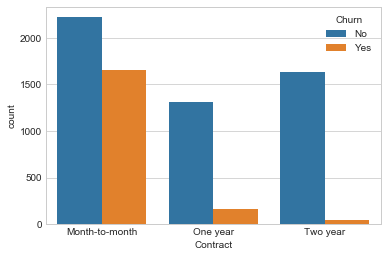

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Contract',hue='Churn',data=customer)

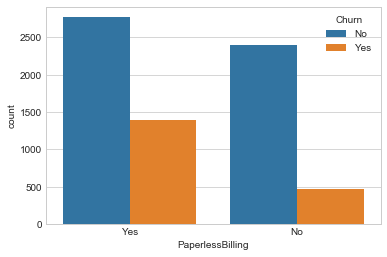

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='PaperlessBilling',hue='Churn',data=customer)

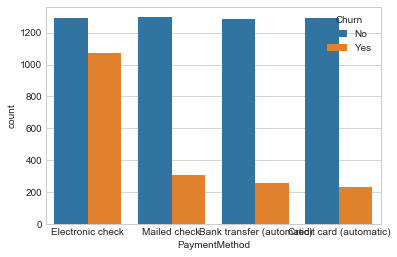

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='PaymentMethod',hue='Churn',data=customer)

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(cn.drop('Churn',axis=1), 
                                                    cn['Churn'],test_size=25/75, 
                                                    random_state=2018)

## Training and Predicting

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
predictions = logmodel.predict(x_test)

## Evaluation

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         No       0.83      0.91      0.87      1744
        Yes       0.63      0.47      0.54       600

avg / total       0.78      0.79      0.78      2344



In [44]:
logmodel.coef_

array([[-0.10387307,  0.01178043,  0.00060524]])